In [17]:
# this is using the hsnt kernel conda environment

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from __code.white_beam import WhiteBeam

from __code import system

system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

# Select top sample folder

This folder will contains all the runs (1 run per angle).

In [18]:
o_white_beam = WhiteBeam(system=system)
o_white_beam.select_top_sample_folder()

Top sample folder selected: /SNS/VENUS/IPTS-33699/shared/autoreduce/mcp/September20_2024_PurpleCar_GoldenRatio_CT_5_0_C_Cd_inBeam_Resonance


# Select top OB folder

Just like for the sample, this folder contains 1 or more runs of the open beam images

In [19]:
o_white_beam.select_top_ob_folder()

Top ob folder selected: /SNS/VENUS/IPTS-33699/shared/autoreduce/mcp/September26_2024_PurpleCar_OpenBean_5_0_C_Cd_inBeam_Resonance


# Pre-processing the data

This step will filter the data using the following criteria

* all the runs that do not have any tif images in it will be **rejected**
* the proton charge of each run will be retrieved and display in a recap graph. It will be up to the users to **select the proton charge** to use as well as the **acceptance criteria**. This is because the proton charge of each run is always slightly different, this criteria define the range for which 2 runs are considered being acquired with the same proton charge.

<u><b>Instructions</u></b>

 - Use the sliders to define the **sample proton charge** and **OB proton charge** to use
 - Use the second slider to define the size of the **acceptance criteria range**

<font size=1><u>Developer Notes</u>: data are stored in <i>list_of_runs = {DataType.sample: {'Run_1234':
 {Run.full_path: "", Run.proton_charge: "", Run.use_it: "", Run.angle: ""}, ...}</i></font>
 

In [20]:
o_white_beam.checking_data()

interactive(children=(FloatSlider(value=5.0, description='sample pc', max=6.39261979793, min=-0.95576512851), …

This will recap the list of runs that will be used for SAMPLE and OB. 

Because some runs look like they are ok but still need to be rejected, **Feel free to manually select any run you want to exclude !**

<font size=1><u>Developer Notes</u>: this step will set the <i>Run.use_it</i> parametere of the <i>list_of_runs> dictionary. 

In [21]:
o_white_beam.recap_data()

## Combine all the images within each run

This step will add all the counts within a given run, making it feel like the data were acquired in white beam mode, loosing the time-of-flight (TOF) information

<font size=1><u>Developer Notes</u>: change the value of <i>Run.use_it</i> for runs rejected and combine runs data in <i>master_3d_data_array = {DataType.sample: [runs, y, x], ...}</font>

In [22]:
o_white_beam.combine_images()

100%|██████████| 2/2 [00:17<00:00,  8.55s/it]


# Pre-processing

* remove dead pixels
* remove abnormal very high counts

By default, all the pixels found in the first and last bin are considered as **bad** pixels. You have the option to change those settings. 

In [23]:
o_white_beam.clean_images_setup()

interactive(children=(IntSlider(value=10, continuous_update=False, description='Nbr bins', max=1000, min=10), …

Perform the cleaning using the settings define in the previous cell.

<font size=1><u>Developer Notes</u>: create the <i>master_3d_data_array_cleaned<i> dictionary.

In [24]:
o_white_beam.clean_images()

100%|██████████| 2/2 [00:00<00:00, 447.73it/s]


<hr><hr style="border-bottom: dotted 1px;" />
<font color='blue' size='5'>OPTIONAL</font>: Export cleaned images

If you don't want to export the intermediate cleaned images, just skip the next cell!

In [ ]:
o_white_beam.select_export_folder()

In [ ]:
o_white_beam.export_cleaned_images()

<hr style="border-bottom: dotted 1px;" /><hr>

# Normalization

<font size=1><u>Developer Notes</u>: create the <i>normalized_data</i> 3D data array.

In [25]:
o_white_beam.normalization()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='blue' size='5'>OPTIONAL</font>: run it only if you want to visualize the normalized data

In [26]:
o_white_beam.visualize_normalization()

interactive(children=(IntSlider(value=0, description='image_index', max=175), IntSlider(value=0, description='…

<hr><hr style="border-bottom: dotted 1px;" />
<font color='blue' size='5'>OPTIONAL</font>: run if you want to export the normalized data

Select the folder where to export the normalized images

In [ ]:
o_white_beam.select_export_normalized_folder()

Run this cell to execute the export of the normalized images

In [ ]:
o_white_beam.export_normalized_images()

<hr style="border-bottom: dotted 1px;" /><hr>

# Chips correction

<font size=1><u>Developer Notes</u>: create the <i>corrected_images<i> 3D data array</font>

In [27]:
o_white_beam.chips_correction()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='blue' size='5'>OPTIONAL</font>: display images before and after chips correction

In [12]:
o_white_beam.visualize_chips_correction()

interactive(children=(IntSlider(value=0, description='image_index', max=87), IntSlider(value=0, description='v…

<hr><hr style="border-bottom: dotted 1px;" />
<font color='blue' size='5'>OPTIONAL</font>: run if you want to remove any stripes causing ring artifacs in the reconstruction

## Remove stripes

<font size=1><u>Developer Notes</u>: this step will create the 3d array <i>strip_corrected_images</i>

In [ ]:
o_white_beam.select_remove_strips_algorithms()

In [ ]:
o_white_beam.define_settings()

In [ ]:
o_white_beam.remove_strips_and_display()

<hr style="border-bottom: dotted 1px;" /><hr>

# Calculate center of rotation and tilt

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>center of rotation</b> and the <b>tilt</b>
<br><br>

First, you need to select an vertical range contaning the sample

<font color='yellow'>Tips</font> - part of the sample <b>MUST</b> be within the range

In [28]:
o_white_beam.select_sample_roi()

interactive(children=(IntSlider(value=0, description='y_top', max=513), IntSlider(value=513, description='y_bo…

> Finding the rotation axis position...
Rotation axis Found!
offset = 5.0    tilt angle = 0.10795563054574431 °
average of residuals  =  inf


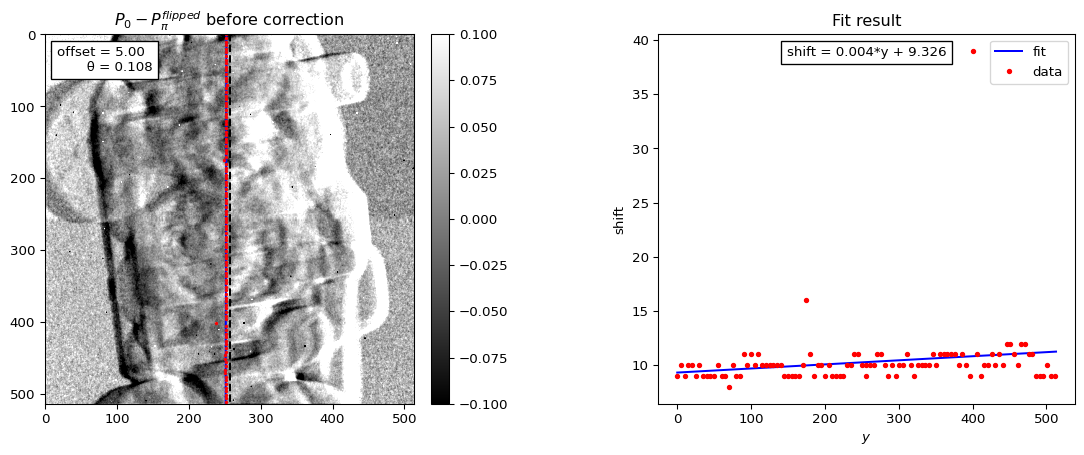

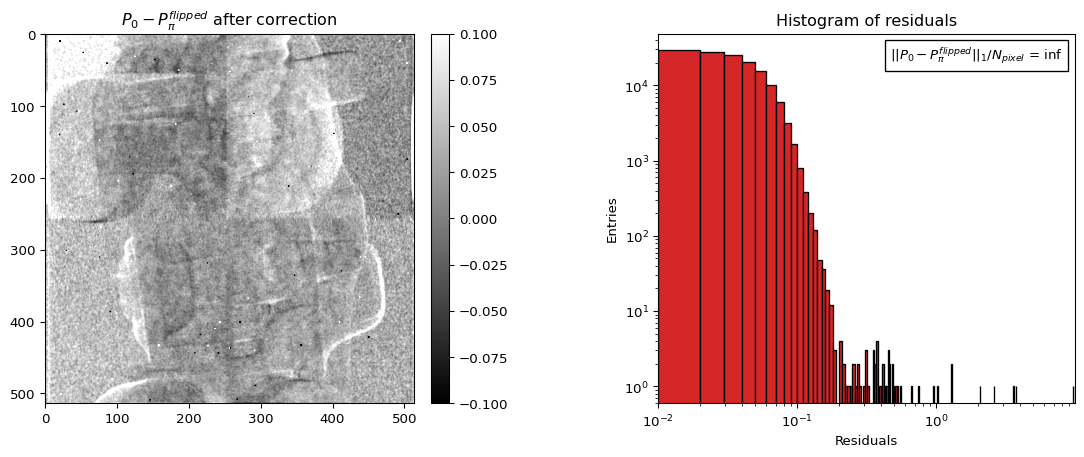

> Correcting rotation axis misalignment...


100%|██████████| 176/176 [00:00<00:00, 279.56 images/s]


In [29]:
o_white_beam.calculate_center_of_rotation_and_tilt()

# launch svmbir

In [1]:
o_white_beam.svmbir_settings()

NameError: name 'o_white_beam' is not defined

In [ ]:
o_white_beam.svmbir_display_projections()

In [31]:
o_white_beam.svmbir_run()

ZeroDivisionError: Weights sum to zero, can't be normalized